In [ ]:
import pandas as pd



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=0f1d92a45ef9fb2326e36cca722fb304057c0cc05d11f778e14c17207d666f19
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = "/content/drive/MyDrive/Projects Data/Comment Classification/23k_r_gaming_comments_sentiments.csv"

In [ ]:
df= pd.read_csv(data)


**Data Cleaning**
we will do the  following processes:


1.   Handling missing values
2.   Remove Unecessary symbols(Punction marks, numbers, etc..)

3.   Covert texts to lowercase letters.
4.   Remove(stop words) which don't add much meaning





In [ ]:
# Knowing data information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23189 entries, 0 to 23188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23189 non-null  int64 
 1   Comment     23159 non-null  object
 2   sentiment   23174 non-null  object
dtypes: int64(1), object(2)
memory usage: 543.6+ KB
None


In [ ]:
 #knowing the sum of null values
print(df.isnull().sum())


Unnamed: 0     0
Comment       30
sentiment     15
dtype: int64


In [ ]:
df.dropna(inplace=True)


In [ ]:
# Replace the comments have the value= [deleted] with 'neutral'

df.loc[df['Comment'] == '[deleted]', 'Comment'] = 'neutral'


In [ ]:
# Check if there is any row in Comment column have '[deleted]' value
x = '[deleted]' in df['Comment'].values
print(x)

False


In [ ]:
#
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 23158 entries, 0 to 23188
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23158 non-null  int64 
 1   Comment     23158 non-null  object
 2   sentiment   23158 non-null  object
dtypes: int64(1), object(2)
memory usage: 723.7+ KB
None


In [ ]:
# print(data.info())
df.head()

,Unnamed: 0,Comment,sentiment
0,0,Them: I don't think I like this game.\n\nMe: B...,negative
1,1,Then you leave them to farm the smaller creatu...,negative
2,2,Nothing beats the feeling you get when you see...,positive
3,3,"[Also, they're made of paper](https://i.imgur....",negative
4,4,Haha... That was exactly it when my brother tr...,positive


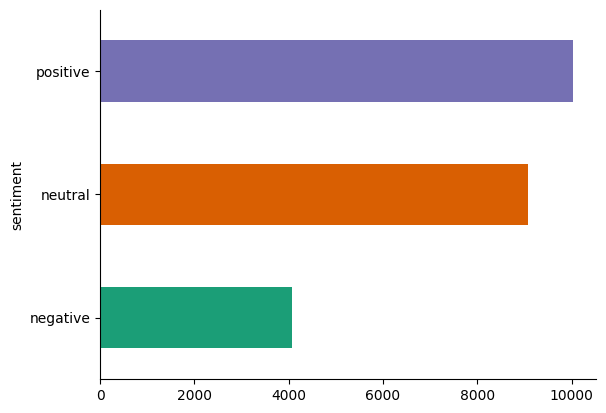

In [ ]:
# Ploting Sentiment types
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Removing unnecessary symbols and stop words
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))


def clean_text(text):
  text= re.sub(r'[^a-zA-Z\s]','',text)

  text = text.lower()

  word_tokens = word_tokenize(text)

  filtered_text =[word for word in word_tokens if word not in stop_words]

  return ' '.join(filtered_text)


#Apply clean_text function on 'comment' column


df['cleaned_comment'] = df['Comment'].apply(clean_text)

print(df [['Comment', 'cleaned_comment']])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                 Comment  \
0      Them: I don't think I like this game.\n\nMe: B...   
1      Then you leave them to farm the smaller creatu...   
2      Nothing beats the feeling you get when you see...   
3      [Also, they're made of paper](https://i.imgur....   
4      Haha... That was exactly it when my brother tr...   
...                                                  ...   
23184                                    Don't be angry.   
23185  Myself, a human being of my own free will, has...   
23186         YOU DONT CALL THE SHOTS AROUND HERE MISTER   
23187  Sorry, but are you going to [edit](https://www...   
23188  Haha I had to put it there because a part of t...   

                                         cleaned_comment  
0      dont think like game havent even played minute...  
1      leave farm smaller creatures either wait help ...  
2      nothing beats feeling get see fall love like y...  
3      also theyre made paperhttpsiimgurcom

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Convert textual sentiments to numeric using Label Encoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['sentiment'])

#Convert cleaned_comment to numerical features using TF_IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['label_encoded']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.6167962003454232
Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.08      0.14       796
     neutral       0.80      0.47      0.59      1805
    positive       0.56      0.96      0.70      2031

    accuracy                           0.62      4632
   macro avg       0.75      0.50      0.48      4632
weighted avg       0.71      0.62      0.56      4632



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Load stopwords and punkt from NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Define stop words
stop_words = set(stopwords.words('english'))

# Function to clean text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove unnecessary symbols
    text = text.lower()  # Convert text to lowercase
    word_tokens = word_tokenize(text)  # Tokenize text
    filtered_text = [word for word in word_tokens if word not in stop_words]  # Remove stop words
    return ' '.join(filtered_text)

# Apply the clean_text function to the 'Comment' column
df['cleaned_comment'] = df['Comment'].apply(clean_text)

# Convert textual sentiments to numeric using Label Encoder
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['sentiment'])

# Convert cleaned_comment to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['label_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train and evaluate SVM
print("Support Vector Machine (SVM) Classifier:")
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


print('Accuracy:', accuracy_score(y_test, svm_pred))
print('Classification Report:')
print(classification_report(y_test, svm_pred, target_names=label_encoder.classes_))
print('Classification Report (Train):')
print(classification_report(y_train, y_train_pred))
print('Classification Report (Test):')
print(classification_report(y_test, y_test_pred))
print('Confusion Matrix (Test):')
print(confusion_matrix(y_test, y_test_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Support Vector Machine (SVM) Classifier:
Accuracy: 0.7966321243523317
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.51      0.59       796
     neutral       0.78      0.85      0.81      1805
    positive       0.83      0.87      0.85      2031

    accuracy                           0.80      4632
   macro avg       0.78      0.74      0.75      4632
weighted avg       0.79      0.80      0.79      4632

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.97      0.20      0.34      3269
           1       0.91      0.62      0.74      7269
           2       0.62      0.99      0.76      7988

    accuracy                           0.71     18526
   macro avg       0.83      0.60      0.61     18526
weighted avg       0.79      0.71      0.68     18526

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      